###ALZHEIMERS PATIENT ANALYSIS BY USING Imagery and Non-Imagery DATA###


Alzheimer's disease(AD) is a degenerative brain disease with no cure and it is the most common type of dementia. My purpose to this analysis is to characterize alzheimers patients by the help of set of data parameters. Since it is sixth leading cause of death in the United States, it needs to be studied properly.It is commonly found in seniors or elderly people, thus all the patients used for study are of above 60 yrs old. Scores from longitudinal clinical tests, like the mini-mental state exam (MMSE), clinical dementia rating(CDR), AD assessment scale, have shown high correlation with AD disease progression and mapping this data is helpful for the clinicians to provide interventions in the asymptomatic preclinical period.



## Downloading the Dataset

The data i have choosen for my purpose is from OASIS (open access series of imaging studies) from the Kaggle website which is publicly available data that provides researchers access to cross-sectional and longitudinal data but for my purpose i will focus only on Longitudinal data. In this data both imagery and non-imagery data sources studied , the imagery data were restricted to the centre slices as the outer slices contain less information about AD presence and severity.The total number of patients taken for study are 373.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

ERROR: kaggle 1.5.8 has requirement urllib3<1.25,>=1.21.1, but you'll have urllib3 1.25.9 which is incompatible.


In [2]:

dataset_url = 'https://www.kaggle.com/jboysen/mri-and-alzheimers?select=oasis_longitudinal.csv' 

In [3]:
#import opendatasets as od
#od.download(dataset_url)

The dataset has been downloaded and extracted.

In [4]:
project_name = "alzheimers-patient-analysis-by-using-imagery-and-nonimagery-data" 

In [5]:
!pip install jovian --upgrade -q

In [6]:
import jovian

In [7]:

jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "bt19m018/alzheimers-patient-analysis-by-using-imagery-and-nonimagery-data" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/bt19m018/alzheimers-patient-analysis-by-using-imagery-and-nonimagery-data


'https://jovian.ml/bt19m018/alzheimers-patient-analysis-by-using-imagery-and-nonimagery-data'

## Data Preparation and Cleaning

There are several variable used in this data, and as i mentioned before i will focus only on longitudinal data not on cross-sectional. I will use only those variables which are necessary for my further studies. Some of them are:
.....#CDR(Clinical Dementia Rating)- developed to measure dementia severity by using rating from 0-5 where 0= non dementic and 5= highly dementic.
.....#Socio-demographic data- it includes 'gender', 'age', 'education','socioeconomic status (SES- where 0= lower class and 5= upper most class)'
.....#Clinical predictor variables- this includes 'Mini-mental state exam(MMSE- this data collected on the basis of questionairre)','Atlas Scaling Factor(ASF= one parameter scaling factor that allows for comparison of the estimated total intracranial volume based on human anatomy)','Estimated total intracranial Volume(eTIV)','Normalized whole brain volume(nWBV)'
.....#Imagery variables or mri data.



In [8]:
import pandas as pd

In [9]:
mri_raw_df=pd.read_csv( "oasis_longitudinal.csv")

In [10]:
mri_raw_df

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
0      14  2.0  27.0  0.0  1987  0.696  0.883  
1      14  2.0  30.0  0.0  2004  0.681  0.876  
2      12  NaN  23.0  0.5  1678  0.736  1.046  
3      12  NaN  28.0  0.5  1738  0.713  1.010  
4      12  NaN  22.0  0.5  1698  0.701  1.034  
..    ...  ...   ...  ...   ...    ...    ...  
368    16  1.0  28.0  0.5  1693  0.694  1.037  
369    16  1.0  26.0  0.5  1688  0.675  1.040  
370    13  2.0  30.0  0.0  1319  0.801  1.331  
371    13  2.0  30.0  0.0  1327  0.796  1.323  
372    13  2.0  30.0  0.0  1333  0.801  1.317  

[373 rows x 15 columns]

In [11]:
mri_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [12]:
mri_raw_df.describe()

Visit     MR Delay         Age        EDUC         SES  \
count  373.000000   373.000000  373.000000  373.000000  354.000000   
mean     1.882038   595.104558   77.013405   14.597855    2.460452   
std      0.922843   635.485118    7.640957    2.876339    1.134005   
min      1.000000     0.000000   60.000000    6.000000    1.000000   
25%      1.000000     0.000000   71.000000   12.000000    2.000000   
50%      2.000000   552.000000   77.000000   15.000000    2.000000   
75%      2.000000   873.000000   82.000000   16.000000    3.000000   
max      5.000000  2639.000000   98.000000   23.000000    5.000000   

             MMSE         CDR         eTIV        nWBV         ASF  
count  371.000000  373.000000   373.000000  373.000000  373.000000  
mean    27.342318    0.290885  1488.128686    0.729568    1.195461  
std      3.683244    0.374557   176.139286    0.037135    0.138092  
min      4.000000    0.000000  1106.000000    0.644000    0.876000  
25%     27.000000    0.000000  1357.000000    0.700000    1.099000  
50%     29.000000    0.000000  1470.000000    0.729000    1.194000  
75%     30.000000    0.500000  1597.000000    0.756000    1.293000  
max     30.000000    2.000000  2004.000000    0.837000    1.587000

In [13]:
total_missing_values=mri_raw_df.isna().sum()
total_missing_values

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [14]:
# Now i need to drop some of the columns which are not helpful in my analysis,
#i am removing hand column because we already know that we took data of Right Hand side of patients.

mri_changed_df= mri_raw_df.drop(labels= 'Hand', axis= 1)
mri_changed_df.head(5)


Subject ID         MRI ID        Group  Visit  MR Delay M/F  Age  EDUC  SES  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M   87    14  2.0   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M   88    14  2.0   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M   75    12  NaN   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M   76    12  NaN   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M   80    12  NaN   

   MMSE  CDR  eTIV   nWBV    ASF  
0  27.0  0.0  1987  0.696  0.883  
1  30.0  0.0  2004  0.681  0.876  
2  23.0  0.5  1678  0.736  1.046  
3  28.0  0.5  1738  0.713  1.010  
4  22.0  0.5  1698  0.701  1.034

In [15]:
#successfully dropped Hand column
#Now, i need to replace missing data in some columns(SES and MMSE)with their respective median value
import numpy as np
median= mri_changed_df.SES.median()

mri_changed_df["SES"]= mri_changed_df["SES"].fillna((median))
mri_changed_df["MMSE"]=mri_changed_df["MMSE"].fillna((mri_changed_df['SES'].median()))
mri_changed_df

Subject ID         MRI ID        Group  Visit  MR Delay M/F  Age  EDUC  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M   87    14   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M   88    14   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M   75    12   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M   76    12   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M   80    12   
..         ...            ...          ...    ...       ...  ..  ...   ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M   82    16   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M   86    16   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F   61    13   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F   63    13   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F   65    13   

     SES  MMSE  CDR  eTIV   nWBV    ASF  
0    2.0  27.0  0.0  1987  0.696  0.883  
1    2.0  30.0  0.0  2004  0.681  0.876  
2    2.0  23.0  0.5  1678  0.736  1.046  
3    2.0  28.0  0.5  1738  0.713  1.010  
4    2.0  22.0  0.5  1698  0.701  1.034  
..   ...   ...  ...   ...    ...    ...  
368  1.0  28.0  0.5  1693  0.694  1.037  
369  1.0  26.0  0.5  1688  0.675  1.040  
370  2.0  30.0  0.0  1319  0.801  1.331  
371  2.0  30.0  0.0  1327  0.796  1.323  
372  2.0  30.0  0.0  1333  0.801  1.317  

[373 rows x 14 columns]

In [16]:
mri_changed_df= mri_changed_df.rename(columns= {'MR Delay':'MR_Delay'})

In [17]:
import jovian

In [18]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "bt19m018/alzheimers-patient-analysis-by-using-imagery-and-nonimagery-data" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/bt19m018/alzheimers-patient-analysis-by-using-imagery-and-nonimagery-data


'https://jovian.ml/bt19m018/alzheimers-patient-analysis-by-using-imagery-and-nonimagery-data'

## Exploratory Analysis and Visualization

In this i will try to explore the data as much as i can bu using matplotlib(which help me to show graphically) and by numpy(it's functions help me at various places to sort my data better)



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [19]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (18, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Check the patients who have below 12 education which means moderate educated

In [20]:
education_level= mri_changed_df.EDUC<12
education_level

0      False
1      False
2      False
3      False
4      False
       ...  
368    False
369    False
370    False
371    False
372    False
Name: EDUC, Length: 373, dtype: bool

In [21]:
mri_changed_df[education_level]

Subject ID         MRI ID        Group  Visit  MR_Delay M/F  Age  EDUC  \
27   OAS2_0016  OAS2_0016_MR1     Demented      1         0   M   88     8   
28   OAS2_0016  OAS2_0016_MR2     Demented      2       707   M   90     8   
78   OAS2_0040  OAS2_0040_MR1     Demented      1         0   M   84     6   
79   OAS2_0040  OAS2_0040_MR2     Demented      2       567   M   86     6   
80   OAS2_0040  OAS2_0040_MR3     Demented      3      1204   M   88     6   
136  OAS2_0064  OAS2_0064_MR1     Demented      1         0   F   78     8   
137  OAS2_0064  OAS2_0064_MR2     Demented      2       830   F   81     8   
138  OAS2_0064  OAS2_0064_MR3     Demented      3      1282   F   82     8   
161  OAS2_0075  OAS2_0075_MR1     Demented      1         0   F   73     8   
162  OAS2_0075  OAS2_0075_MR2     Demented      2       567   F   75     8   
179  OAS2_0085  OAS2_0085_MR1  Nondemented      1         0   F   78     8   
180  OAS2_0085  OAS2_0085_MR2  Nondemented      2       670   F   80     8   
209  OAS2_0100  OAS2_0100_MR1  Nondemented      1         0   F   77    11   
210  OAS2_0100  OAS2_0100_MR2  Nondemented      2      1218   F   80    11   
211  OAS2_0100  OAS2_0100_MR3  Nondemented      3      1752   F   82    11   
225  OAS2_0106  OAS2_0106_MR1     Demented      1         0   F   70    11   
226  OAS2_0106  OAS2_0106_MR2     Demented      2       729   F   72    11   
229  OAS2_0109  OAS2_0109_MR1  Nondemented      1         0   M   81    11   
230  OAS2_0109  OAS2_0109_MR2  Nondemented      2       766   M   83    11   
252  OAS2_0121  OAS2_0121_MR1  Nondemented      1         0   F   73    11   
253  OAS2_0121  OAS2_0121_MR2  Nondemented      2       647   F   74    11   
275  OAS2_0134  OAS2_0134_MR1     Demented      1         0   F   70    11   
276  OAS2_0134  OAS2_0134_MR2     Demented      2       539   F   71    11   

     SES  MMSE  CDR  eTIV   nWBV    ASF  
27   4.0  25.0  0.5  1651  0.660  1.063  
28   4.0  23.0  0.5  1668  0.646  1.052  
78   4.0  25.0  0.5  1310  0.727  1.339  
79   4.0  27.0  0.5  1320  0.724  1.329  
80   4.0  23.0  0.5  1348  0.713  1.302  
136  5.0  23.0  1.0  1462  0.691  1.200  
137  5.0  26.0  0.5  1459  0.694  1.203  
138  5.0  18.0  0.5  1464  0.682  1.199  
161  5.0  25.0  0.5  1151  0.743  1.525  
162  5.0  22.0  0.5  1143  0.741  1.535  
179  5.0  29.0  0.0  1383  0.756  1.269  
180  5.0  27.0  0.0  1381  0.751  1.270  
209  4.0  29.0  0.0  1583  0.777  1.108  
210  4.0  30.0  0.0  1586  0.757  1.107  
211  4.0  30.0  0.0  1590  0.760  1.104  
225  4.0  22.0  1.0  1445  0.722  1.214  
226  4.0  21.0  1.0  1489  0.686  1.179  
229  4.0  28.0  0.0  1750  0.670  1.003  
230  4.0  29.0  0.0  1744  0.670  1.006  
252  4.0  30.0  0.0  1475  0.726  1.190  
253  4.0  30.0  0.0  1517  0.705  1.157  
275  4.0  29.0  0.5  1295  0.748  1.355  
276  4.0  28.0  0.5  1284  0.741  1.367

**We get that the remaining patients have education level of 8 0r 11 and three of the patients have '6' education level and all are dementic, thus we can find out a relation of education and dementia.**

In [22]:
mri_changed_df.sort_values('Age', ascending= True).head(10)

Subject ID         MRI ID        Group  Visit  MR_Delay M/F  Age  EDUC  \
340  OAS2_0174  OAS2_0174_MR1  Nondemented      1         0   M   60    12   
55   OAS2_0030  OAS2_0030_MR1  Nondemented      1         0   F   60    18   
41   OAS2_0022  OAS2_0022_MR1  Nondemented      1         0   F   61    16   
139  OAS2_0066  OAS2_0066_MR1     Demented      1         0   M   61    18   
196  OAS2_0094  OAS2_0094_MR1  Nondemented      1         0   F   61    16   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F   61    13   
140  OAS2_0066  OAS2_0066_MR2     Demented      2       497   M   62    18   
231  OAS2_0111  OAS2_0111_MR1     Demented      1         0   M   62    12   
56   OAS2_0030  OAS2_0030_MR2  Nondemented      2       932   F   62    18   
341  OAS2_0174  OAS2_0174_MR2  Nondemented      2       695   M   62    12   

     SES  MMSE  CDR  eTIV   nWBV    ASF  
340  4.0  30.0  0.0  1379  0.806  1.273  
55   1.0  30.0  0.0  1402  0.822  1.252  
41   3.0  30.0  0.0  1313  0.805  1.337  
139  1.0  30.0  1.0  1957  0.734  0.897  
196  1.0  30.0  0.0  1513  0.771  1.160  
370  2.0  30.0  0.0  1319  0.801  1.331  
140  1.0  30.0  0.5  1928  0.731  0.910  
231  4.0  17.0  0.5  1525  0.732  1.151  
56   1.0  30.0  0.0  1392  0.817  1.261  
341  4.0  30.0  0.0  1378  0.795  1.274

In [23]:
mri_changed_df.sort_values('Age', ascending= True).tail(10)

Subject ID         MRI ID        Group  Visit  MR_Delay M/F  Age  EDUC  \
35   OAS2_0018  OAS2_0018_MR4    Converted      4      1933   F   92    14   
61   OAS2_0032  OAS2_0032_MR2     Demented      2       642   M   92    12   
13   OAS2_0008  OAS2_0008_MR1  Nondemented      1         0   F   93    14   
353  OAS2_0178  OAS2_0178_MR3  Nondemented      3      1447   F   93    14   
294  OAS2_0143  OAS2_0143_MR3  Nondemented      3      1553   F   93    18   
108  OAS2_0051  OAS2_0051_MR2  Nondemented      2       457   F   94    23   
14   OAS2_0008  OAS2_0008_MR2  Nondemented      2       742   F   95    14   
183  OAS2_0087  OAS2_0087_MR1     Demented      1         0   F   96    17   
109  OAS2_0051  OAS2_0051_MR3  Nondemented      3      1526   F   97    23   
184  OAS2_0087  OAS2_0087_MR2     Demented      2       754   F   98    17   

     SES  MMSE  CDR  eTIV   nWBV    ASF  
35   1.0  27.0  0.5  1423  0.696  1.234  
61   3.0  24.0  0.5  1311  0.676  1.339  
13   2.0  30.0  0.0  1272  0.698  1.380  
353  2.0  30.0  0.0  1488  0.735  1.179  
294  2.0  29.0  0.0  1744  0.723  1.006  
108  1.0  29.0  0.0  1474  0.696  1.190  
14   2.0  29.0  0.0  1257  0.703  1.396  
183  1.0  26.0  1.0  1465  0.683  1.198  
109  1.0  30.0  0.0  1483  0.689  1.184  
184  1.0  21.0  2.0  1503  0.660  1.168

**Thus, we can quantify that patients age are from 60- 98 years old**

Also we can check variation of ages in patients

In [24]:
mri_changed_df.Age.unique()

array([87, 88, 75, 76, 80, 90, 83, 85, 71, 73, 93, 95, 68, 69, 66, 78, 81,
       82, 77, 86, 92, 84, 72, 61, 64, 74, 60, 62, 91, 79, 89, 70, 94, 97,
       65, 67, 63, 96, 98], dtype=int64)

In [25]:
dementic_counts= mri_changed_df.groupby('Group').count()
dementic_counts= dementic_counts['Subject ID'] #to get data with respect to only one column
dementic_counts

Group
Converted       37
Demented       146
Nondemented    190
Name: Subject ID, dtype: int64

**Now, it is clear that how many patients are demented while how many are non-demented**

In [26]:
dementic_counts= mri_changed_df.groupby('Group')['M/F'].sum()
dementic_counts

Group
Converted                  FFFMMMFFFFFFFFFFFFFFFMMMMMFFFFMMFFMMM
Demented       MMMMMMMMFFMMMMMMFFMMMMMMMMMMFFMMMFFMMMFFMMMMMM...
Nondemented    MMFFMMMFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFF...
Name: M/F, dtype: object

**From this, it can signify that Male patients are more dementic as compared to females**

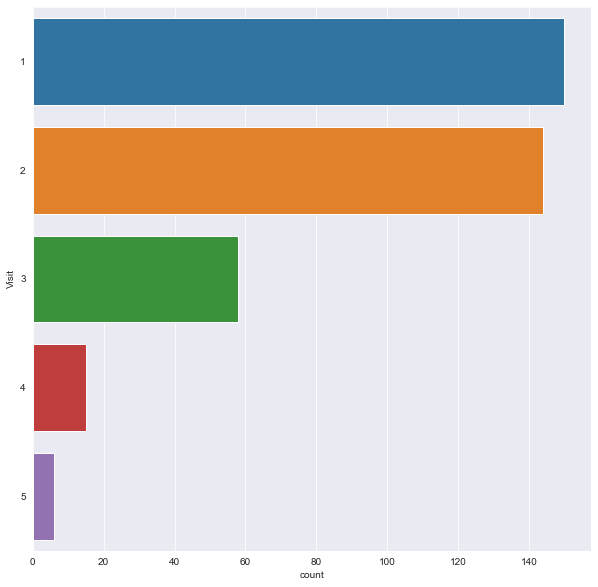

In [27]:
plt.rcParams["figure.figsize"] = (10,10) #increase the graph size
plt.rcParams['font.size'] = 10   #We do tis to increase the fontsize
sns.countplot(y ='Visit',data=mri_changed_df) #we use sns.countplot to plot the frequencies. y is the data u are plotting)
plt.rcParams['font.size'] = 10 

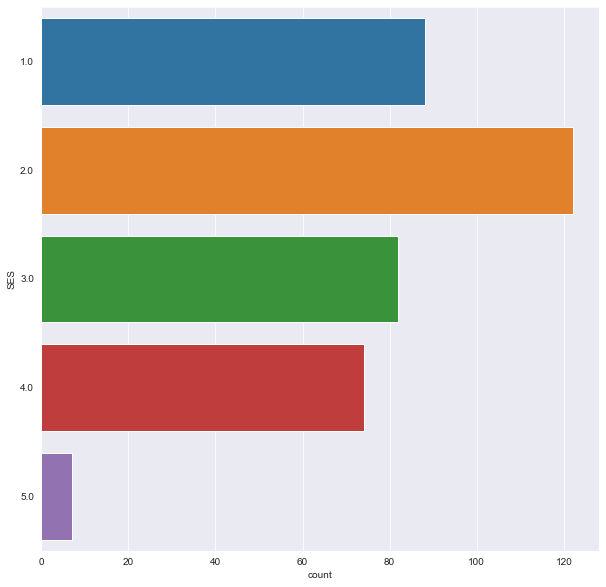

In [28]:
plt.rcParams["figure.figsize"] = (10,10) #increase the graph size
plt.rcParams['font.size'] = 10 #We do tis to increase the fontsize
sns.countplot(y ='SES',data=mri_changed_df) #we use sns.countplot to plot the frequencies. y is the data u are plotting)
plt.rcParams['font.size'] = 10

So, from above it is concluded that most of the patients are of SES= 2.0 means lower and middle class instead of very few are high class i.e. '5'

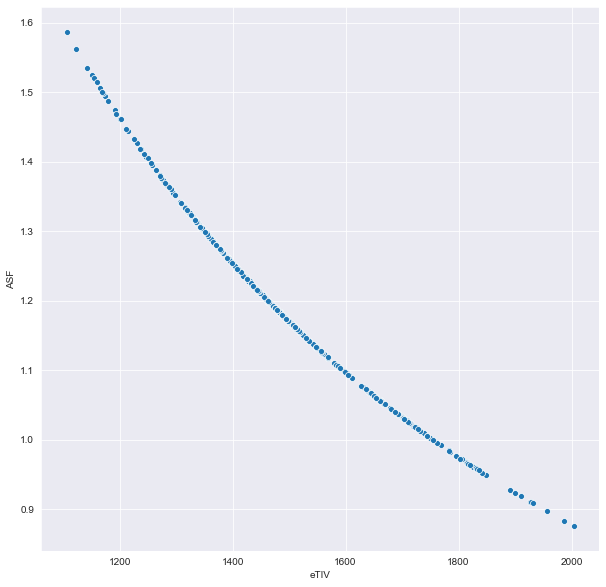

In [29]:
sns.scatterplot(mri_changed_df.eTIV,mri_changed_df.ASF);

**ASF is inversely proportional to eTIV, or i can say higher be the ASF lower will be total intracranial volume**

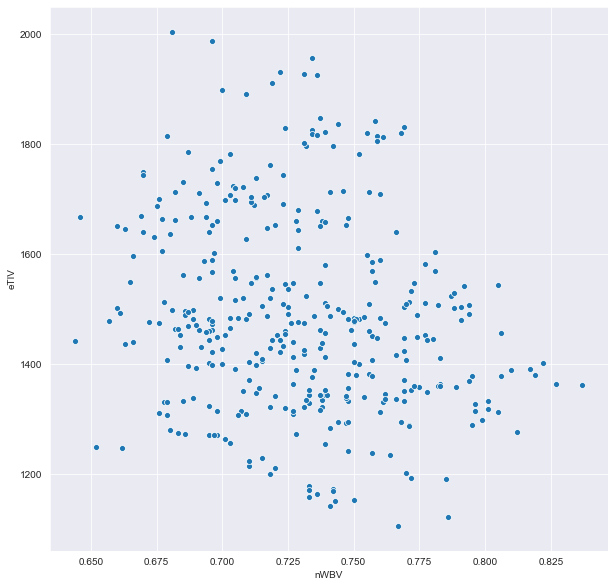

In [30]:
sns.scatterplot(mri_changed_df.nWBV,mri_changed_df.eTIV);

**So, majority of patients have eTIV is from 1300-1600 while nWBV(normalised) is between 0.675-0.775**

In [31]:
import jovian

In [32]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "bt19m018/alzheimers-patient-analysis-by-using-imagery-and-nonimagery-data" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/bt19m018/alzheimers-patient-analysis-by-using-imagery-and-nonimagery-data


'https://jovian.ml/bt19m018/alzheimers-patient-analysis-by-using-imagery-and-nonimagery-data'

## Asking and Answering Questions

TODO - write some explanation here.



#### Q1: How does dementic classification depends on socio-economic factors(i.e. gender,age, SES, education)

In [33]:
#i have classify data on the basis of particular column
dementic_df = mri_changed_df[mri_changed_df.Group == 'demented']
non_dementic_df = mri_changed_df[mri_changed_df.Group == 'Nondemented']
converted_df = mri_changed_df[mri_changed_df.Group == 'converted']

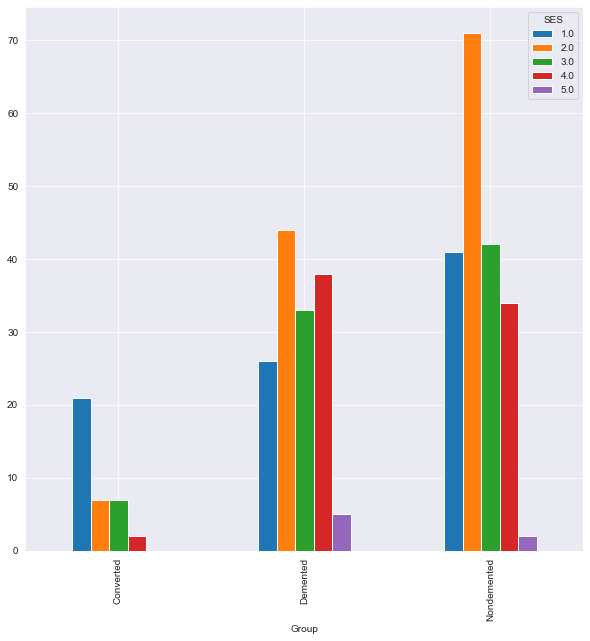

In [34]:
pd.crosstab(mri_changed_df['Group'],mri_changed_df['SES']).plot.bar()

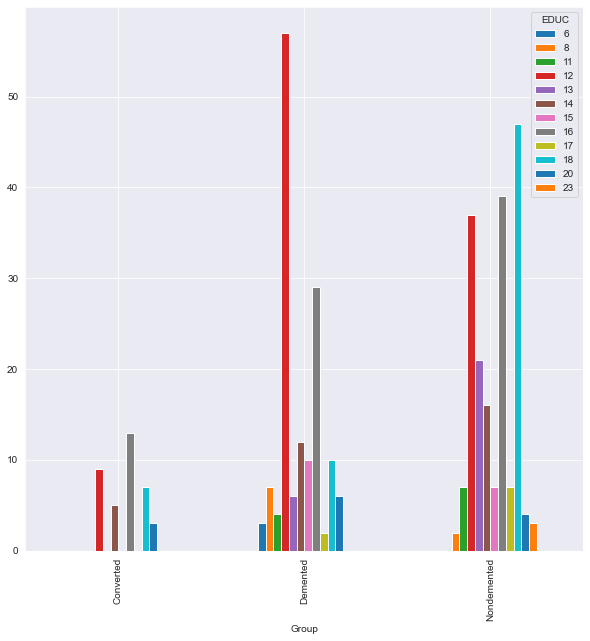

In [35]:
pd.crosstab(mri_changed_df['Group'],mri_changed_df['EDUC']).plot.bar()

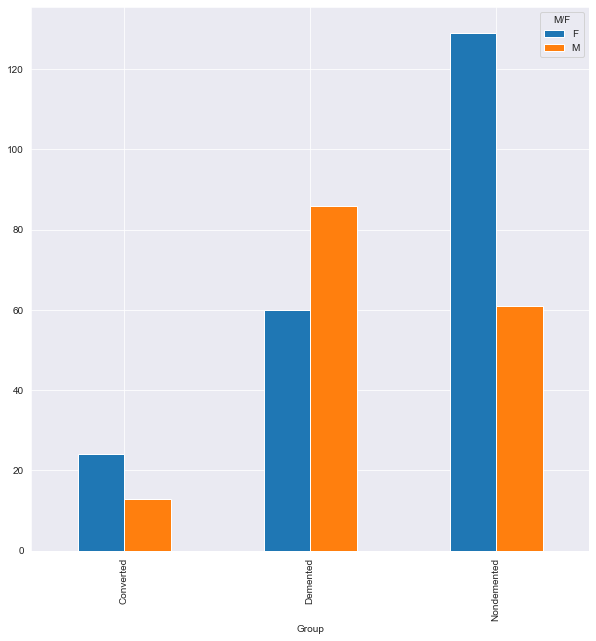

In [36]:
pd.crosstab(mri_changed_df['Group'],mri_changed_df['M/F']).plot.bar()

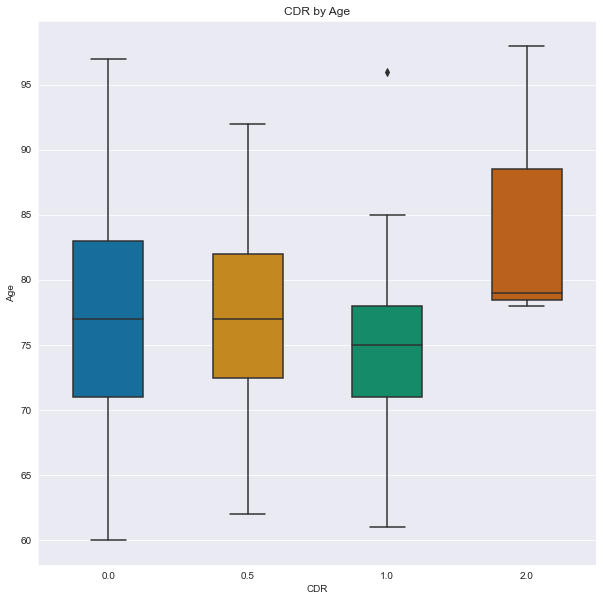

In [37]:
sns.boxplot(y='Age', x='CDR', 
                 data=mri_changed_df, 
                 width=0.5,
                 palette="colorblind")
plt.title("CDR by Age")
plt.xlabel("CDR")
plt.ylabel("Age")
plt.show()

From the above analysis, it is shown that Dementic patients shows SES= 2 and 4 majorly but as compared to non-dementic patients SES= 4 shows more dementic patients.Thus, socially good status patients show high number of dementic patients.
Next, I can say education level= 12 shows highest number of dementic patients and as the education level increases lesser be the chances of dementia.
And, if taking consideration of gender, it seems that more male patients are dementic as compared to women.
CDR=0 says non-dementic and vary with rating,where CDR=2 is dementic. Thus,dementic patients are mainly 78-98 years old.


#### Q2: Relation Between categorizing group and CDR(clinical dementic rating)
Since both these attribute represent status of patients whether dementic or non-dementic, Though CDR helps to show the rate of dementia patient suffering. So i want to see how exact the classification of group with respect to CDR

In [38]:
Dementic_count= mri_changed_df.groupby('Group')['CDR'].count()
Dementic_count

Group
Converted       37
Demented       146
Nondemented    190
Name: CDR, dtype: int64

In [39]:
Dementic_count= mri_changed_df.groupby('CDR')['Group'].count()
Dementic_count

CDR
0.0    206
0.5    123
1.0     41
2.0      3
Name: Group, dtype: int64

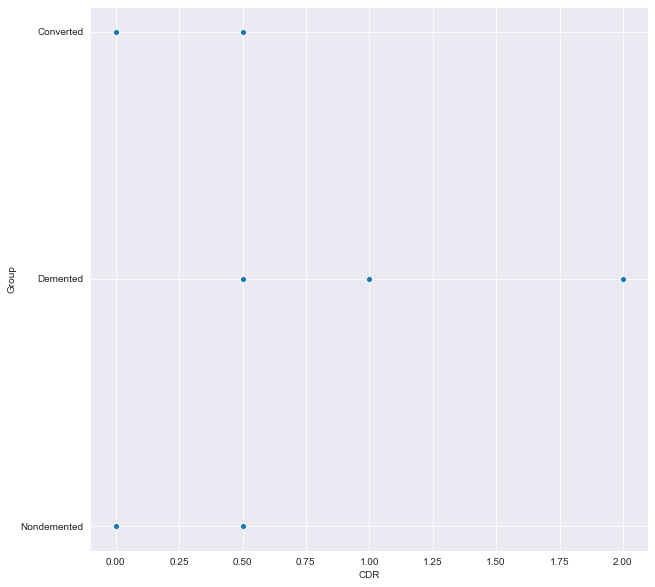

In [40]:
sns.scatterplot(mri_changed_df.CDR, mri_changed_df.Group);

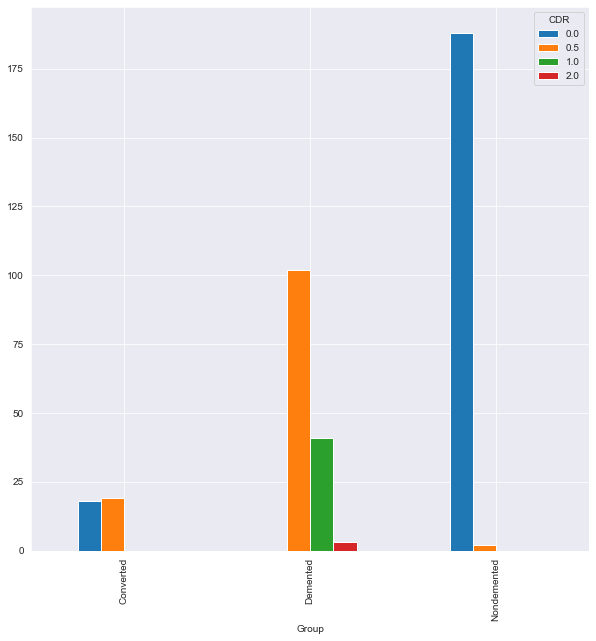

In [41]:
pd.crosstab(mri_changed_df['Group'],mri_changed_df['CDR']).plot.bar()

**We had a relation that Demented patients are corresponding CDR = 0.5, 1, 2
while non Dementic patients have CDR = 0 and 0.5
thus, CDR=0.5 having patients might be dementic.
The description of CDR and Group seem to be measuring the same thing. CDR measures the degree of dementia while Group classifies if a person has dementia or not (I am not sure what converted means, I will have to do some research). I want to further investigate if these variables are similar.** 


#### Q3: Classification of CDR on the basis of Age and Gender

In [42]:
Dementic_count= mri_changed_df.groupby('CDR')['eTIV','ASF'].mean()
Dementic_count

<ipython-input-42-ee981fe33518>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Dementic_count= mri_changed_df.groupby('CDR')['eTIV','ASF'].mean()


eTIV       ASF
CDR                       
0.0  1486.859223  1.197107
0.5  1485.707317  1.196862
1.0  1498.121951  1.186390
2.0  1538.000000  1.149000

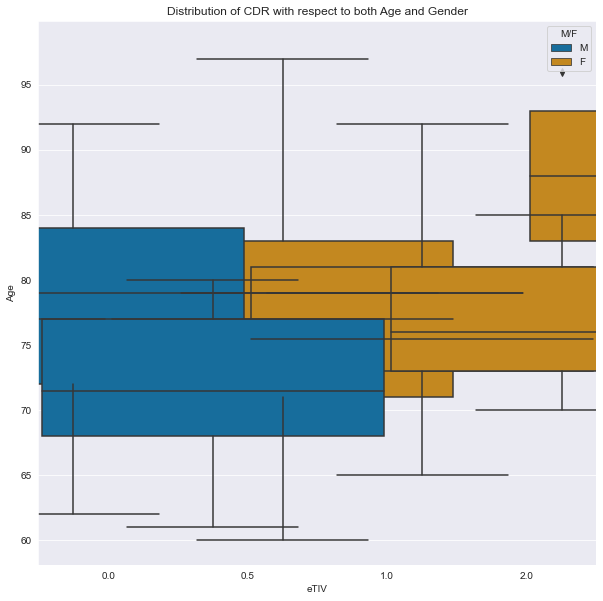

In [43]:
sns.boxplot(y='Age', x='CDR', hue='M/F',
                 data=mri_changed_df, 
                 width=5,
                 palette="colorblind")
plt.title("Distribution of CDR with respect to both Age and Gender")
plt.xlabel("eTIV")
plt.ylabel("Age")
plt.show()

We already knew males are prone to dementia, but here we can the strong dementic patients are female having age of 70-80 years, To know further i need more evaluation

In [44]:
age_count=mri_changed_df.groupby('Age')['M/F'].count()
age_count

Age
60     2
61     4
62     4
63     3
64     3
65     6
66    10
67     6
68    14
69    13
70    12
71    18
72    11
73    26
74    12
75    22
76    16
77    16
78    21
79    11
80    20
81    18
82    17
83    12
84    13
85     9
86    10
87     6
88    10
89     7
90     5
91     4
92     4
93     3
94     1
95     1
96     1
97     1
98     1
Name: M/F, dtype: int64

In [45]:
pd.crosstab(mri_changed_df['Age'],mri_changed_df['M/F']).plot.bar()

I need to check distribution of CDR with respect to both Age and M/F of the patients, in the both graphs we can justify our previous observation clearly . But, The histogram show that the distributions are almost identical. There is a slight bump in frequency around Age=73 for females which is worth noting. The counts of Male/Female are balanced enough that I shouldn’t experience any issue when creating models.

#### Q4: Dementic classification with respect to imaging data(MR_delay), and number of visit

In [46]:
Dementic_count= mri_changed_df.groupby('Group')['MR_Delay','Visit'].mean()
Dementic_count

<ipython-input-46-3cc50f006b72>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Dementic_count= mri_changed_df.groupby('Group')['MR_Delay','Visit'].mean()


MR_Delay     Visit
Group                            
Converted    771.810811  2.027027
Demented     452.541096  1.732877
Nondemented  670.242105  1.968421

In [47]:
sns.scatterplot(x= mri_changed_df.MR_Delay,
               y= mri_changed_df.Visit,
               hue= mri_changed_df.Group,
               s=80)
plt.title("No. of Visit V/s MR_Delay")
plt.xlabel("MR_Delay")
plt.ylabel("Visit")
plt.show()

By comparing the data of dementic and non-dementic patients, i can say non-dementic patients shows large number of visit as compared to dementic patients , also the delay in MRI can be seen majorly among non-demented patients. Thuscan be seen that dementic patients went through mri majorly.

#### Q5. Dementic classification based on clinical predictor variables(MMSE, nWBV, ASF)

In [48]:
dementic_data1= mri_changed_df.groupby('Group')['nWBV','ASF','MMSE'].mean()
dementic_data1

<ipython-input-48-9f737ca3f73a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dementic_data1= mri_changed_df.groupby('Group')['nWBV','ASF','MMSE'].mean()


nWBV       ASF       MMSE
Group                                     
Converted    0.723730  1.212405  28.675676
Demented     0.716301  1.196890  24.205479
Nondemented  0.740900  1.191063  29.226316

In [49]:
sns.heatmap(dementic_data1, annot= True, cmap = 'Blues')

**Thus, clinical factors won't differentiate much between dementia and non-dementic patients, MMSE and nWBV are lowest in case of dementic patients**

In [50]:
import jovian

In [51]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "bt19m018/alzheimers-patient-analysis-by-using-imagery-and-nonimagery-data" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/bt19m018/alzheimers-patient-analysis-by-using-imagery-and-nonimagery-data


'https://jovian.ml/bt19m018/alzheimers-patient-analysis-by-using-imagery-and-nonimagery-data'

## Inferences and Conclusion

From the various graphs above one can make lot of inferences and conclusion which lead to the cause factor of the dementia. But our main aim is to classify Alzheimers, not all dementia patients suffered from Alzheimers, but instead it is a type of dementia that causes problems with memory, thinking and behavior. Symptoms usually develop slowly and get worse over time, becoming severe enough to interfere with daily tasks. This is the reason, we opt different socially impacting factors, and thus show how it varies with the evaluation of Imaging data.

Other focus is to check whether a patient is Alzheimer or not and if yes, then at what degree it get differs with respect to other factors.
I have seen beautiful results by this evaluation and will also look forward to do more experimenting with this data.

In [52]:
import jovian

In [53]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "bt19m018/alzheimers-patient-analysis-by-using-imagery-and-nonimagery-data" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/bt19m018/alzheimers-patient-analysis-by-using-imagery-and-nonimagery-data


'https://jovian.ml/bt19m018/alzheimers-patient-analysis-by-using-imagery-and-nonimagery-data'

## References and Future Work

I took help from the projects available on jovian ML,

learning from the data visualization notebook,

Take data from https://www.kaggle.com/jboysen/mri-and-alzheimers?select=oasis_longitudinal.csv,

Understand data and it's related terminology/concepts from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2895005/

In [54]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
